# Credit Card Fraud Detection

In [20]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#loading the dataset

data = pd.read_csv('creditcard.csv')

In [22]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
data.shape

(284807, 31)

In [25]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [26]:
#taking fraction of data for fraud detection to cut computational requirement
data = data.sample(frac=0.1,random_state=1)
print(data.shape)

(28481, 31)


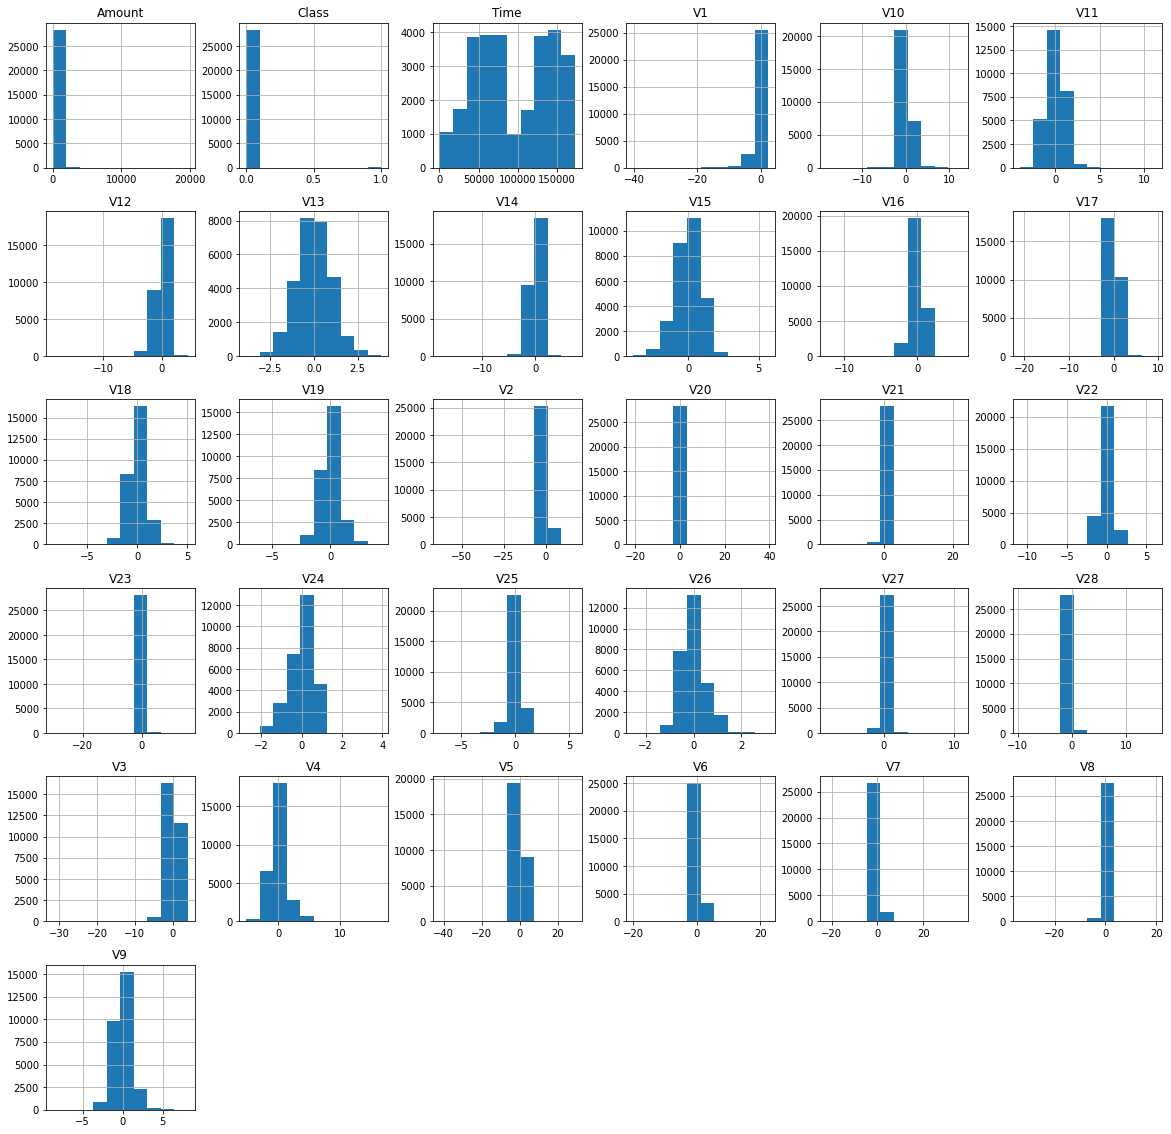

In [27]:
#histogram of each parameter

data.hist(figsize=(20,20))
plt.show()

In [28]:
#number of fraud and valid transactions

fraud = data[data['Class']==1]
valid = data[data['Class']==0]

outlier_fraction = len(fraud)/float(len(data))
print(outlier_fraction)
print('Fraud transactions:{}'.format(len(fraud)))
print('Valid transactions:{}'.format(len(valid)))

0.0017204452090867595
Fraud transactions:49
Valid transactions:28432


In [29]:
data.shape

(28481, 31)

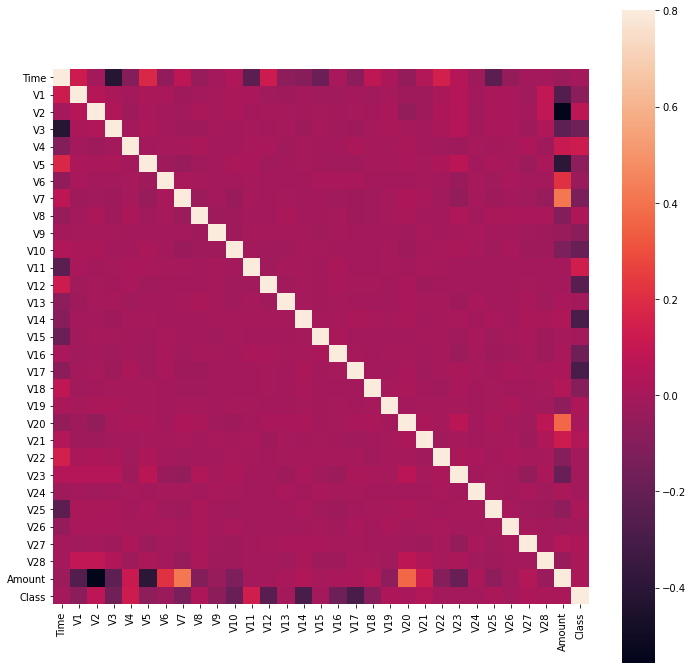

In [34]:
#correlation matrix

corr_mat = data.corr()

fig = plt.figure(figsize=(12,12))

sns.heatmap(corr_mat,vmax=0.8,square=True)

plt.show()

In [35]:
#columns of dataframe
columns = data.columns.tolist()

#remove label variable
columns = [c for c in columns if c not in ['Class']]

target = ['Class']

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(28481, 30)
(28481, 1)


In [47]:
#evaluation metrics
from sklearn.metrics import classification_report,accuracy_score

#models
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state=1

#anomaly detection methods

classifiers = {
    "Isolation Forest":IsolationForest(max_samples=len(X),contamination=outlier_fraction,random_state=state),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
}

In [64]:
n_outliers = len(fraud)



for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        y_pred = clf.predict(X)
        scores_pred = clf.decision_function(X)
        
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1

    
    
    print('{}'.format(clf_name))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Isolation Forest
0.997471998876444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.27      0.27      0.27        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor
0.9966293318352586
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

